# Dataset
Sa to akcje Coca-Coli z ostatnich 3-4 lat, 
importujemy je do programu za pomoca biblioteki pandas.
<br>Potrzebne nam beda tylko data oraz cena zamkniecia.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math
fields = ['date', 'close']
df = pd.read_csv("Desktop/Dane/cola.csv",usecols=fields) # SCIEZKA DO BAZY DANYCH!!!!!!!!!!!!
df.head(n=10)

,date,close
0,2019/03/18,45.41
1,2019/03/15,45.30
2,2019/03/14,45.70
3,2019/03/13,46.22
4,2019/03/12,46.05
5,2019/03/11,46.18
6,2019/03/08,44.84
7,2019/03/07,45.28
8,2019/03/06,45.45
9,2019/03/05,45.60


In [351]:
row_number = df.shape[0] # liczba wierszy


## Tworzymy funkcje liczaca wspolczynnik EMA

In [352]:
def EMA(data,n,index): # n = liczba okresow , index = index p0 w tablicy
    a = 2/(n+1)
    p0 = data[index]
    numerator = p0
    denumerator = 1
    power = 0;
    for i in range ((index+1),(index+n+1)):
        if (i == row_number): break  # jesli wykracza poza zakres to policz dla tylu okresow ile mozesz
        power+=1
        numerator += ((1-a)**power)*data[i]
        denumerator +=(1-a)**power
    return numerator/denumerator


## Nastepnie dla kazdego dnia wyliczamy jego **EMA 26** oraz **EMA 12**
Na podstawie tych wartosci wyliczamy indeks **MACD** = *EMA26* - *EMA12* oraz **SIGNAL** = *EMA9(MACD)*

In [353]:
ema26 = []
ema12 = []
macd = []
signal = []
for i in range (0, row_number):
    ema26.append(EMA(df.close,26,i))
    ema12.append(EMA(df.close,12,i))
    macd.append(ema12[i] - ema26[i])
    
df['ema12'] = ema12
df['ema26'] = ema26
df['macd'] = macd

for i in range (0, row_number):
    signal.append(EMA(df.macd,9,i))

df['signal'] = signal
df


,date,close,ema12,ema26,macd,signal
0,2019/03/18,45.41,45.601258,45.763298,-0.162040,-0.381612
1,2019/03/15,45.30,45.625039,45.835637,-0.210598,-0.462458
2,2019/03/14,45.70,45.669869,45.923823,-0.253954,-0.551318
3,2019/03/13,46.22,45.646614,45.982369,-0.335755,-0.650555
4,2019/03/12,46.05,45.520375,45.991750,-0.471375,-0.751600
5,2019/03/11,46.18,45.419635,46.010902,-0.591267,-0.837926
6,2019/03/08,44.84,45.256126,46.016607,-0.760481,-0.908592
7,2019/03/07,45.28,45.331551,46.140043,-0.808492,-0.945663
8,2019/03/06,45.45,45.339988,46.230483,-0.890495,-0.974389
9,2019/03/05,45.60,45.323261,46.314902,-0.991641,-0.984282


### Rysujemy wykresy MACD oraz SIGNAL w zaleznosci od dnia

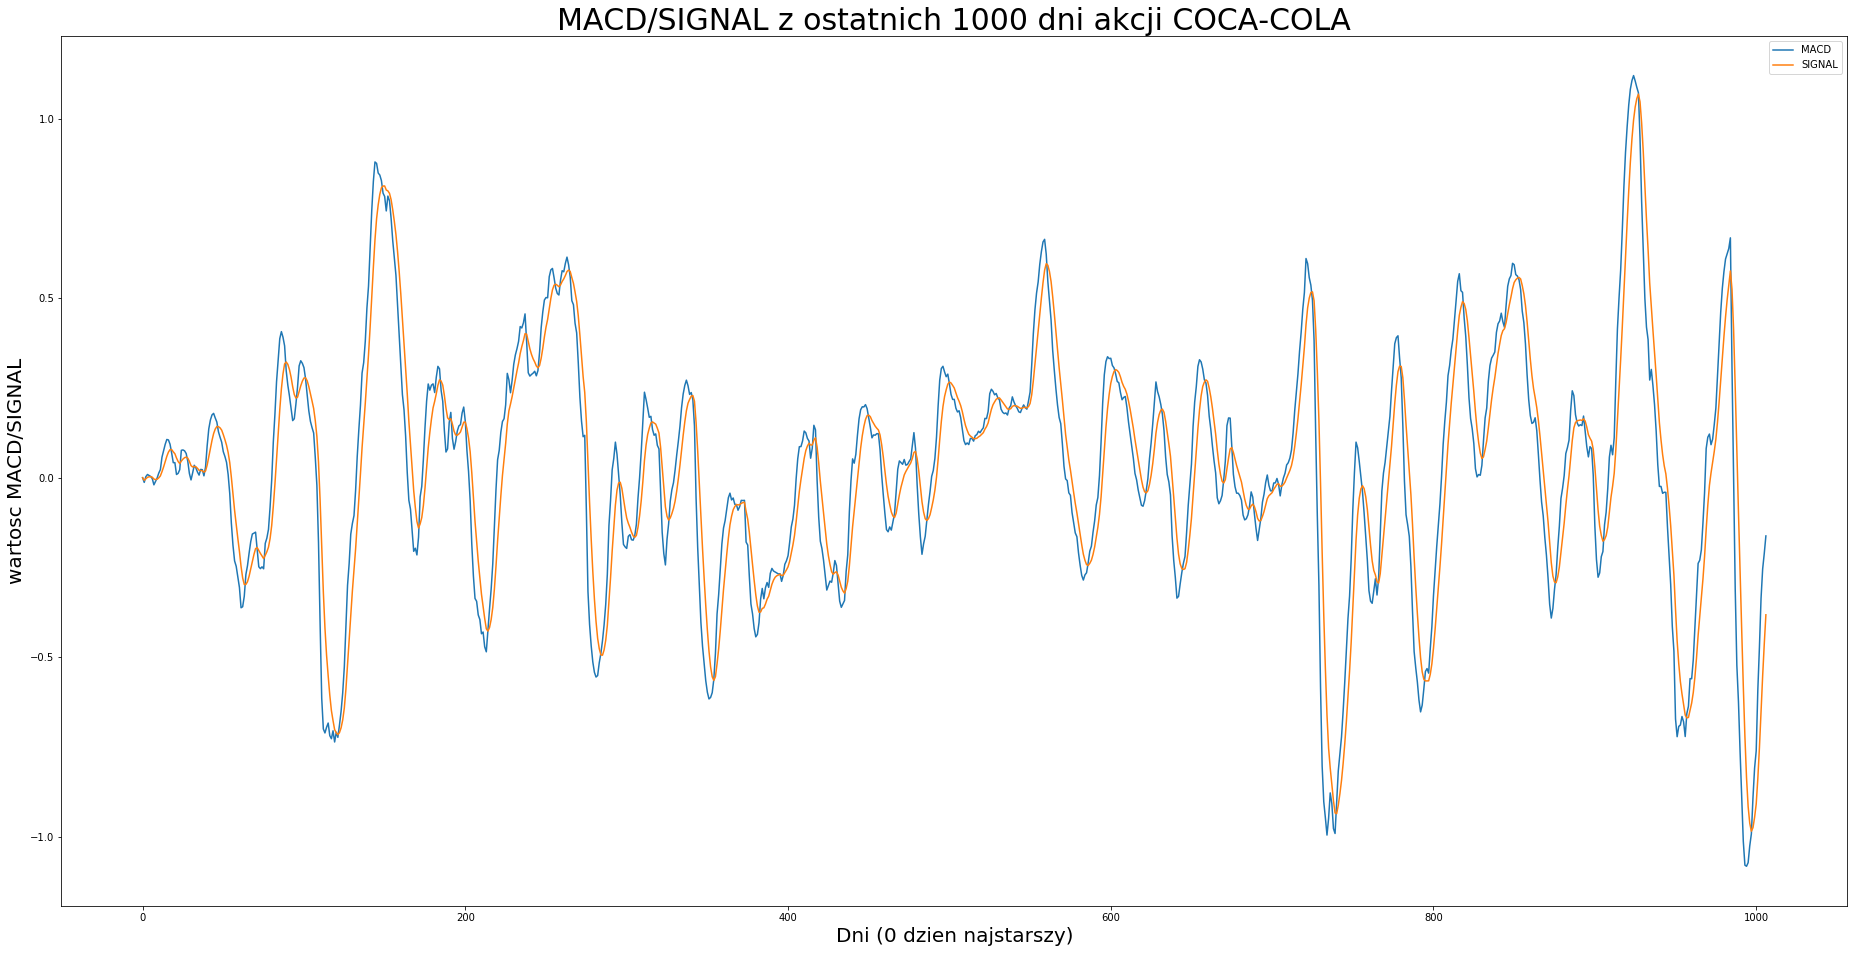

In [354]:
plt.plot(range(0,row_number),macd[::-1],label ='MACD') # 0 to dzien najbardziej odlegly w czasie
plt.plot(range(0,row_number),signal[::-1],label = 'SIGNAL')
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = 32,16
plt.title('MACD/SIGNAL z ostatnich 1000 dni akcji COCA-COLA',fontsize = 30)
plt.xlabel('Dni (0 dzien najstarszy)', fontsize=20)
plt.ylabel('wartosc MACD/SIGNAL', fontsize=20)
plt.show()



## Teraz musimy znalezc miejsca przeciec MACD z SIGNAl
Przeciecie krzywej SIGNAL przez krzywa MACD od dolu oznacza, ze akcje nalezy kupic, a przeciecie od gory oznacza ze akcje nalezy sprzedac, porownujemy zatem wartosci obu wskaznikow, liste przeciec nalezy odwrocic poniewaz na osi X ustalamy 0 jako dzien najstarszy, a nie terazniejszy jak to jest zapisane w dataframe, wiec liczymy 'Od tylu wykresu'(czytamy od prawej do lewej).

In [355]:
cuts= [] # tablica w ktorych wystepuja przeciecia wykresow
macdd = df.macd[::-1]
signall = df.signal[::-1]
for i in range (0,row_number-1):
    if(macdd[i] < signall[i] and macdd[i+1] > signall[i+1]):  # przeciecie macd z dolu
        cuts.append("buy") 
    elif macdd[i] == signall[i] : 
        cuts.append("none")
    elif (macdd[i] > signall[i] and macdd[i+1]< signall[i+1]): #przeciecie macd z gory
        cuts.append("sell") 
    else: 
        cuts.append("none")
        
cuts.append("none") # ostatni element
    
    

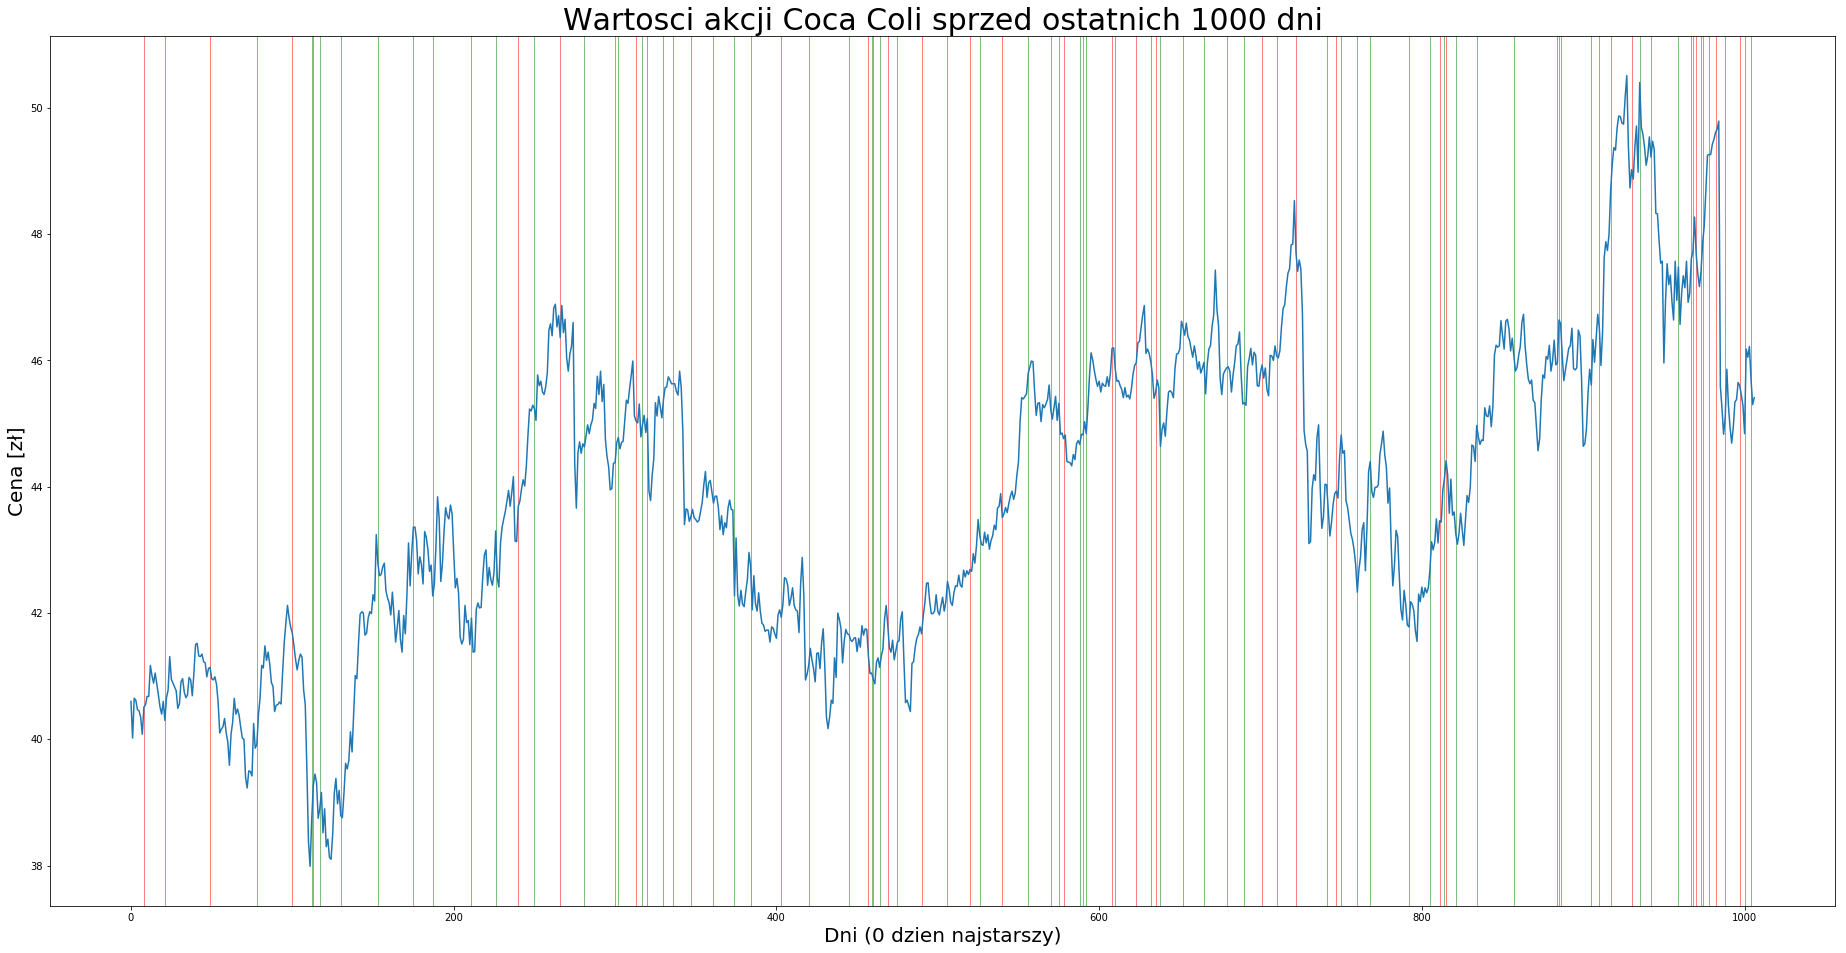

In [356]:

for i in range(0,row_number):
    if cuts[i]=="buy":
        plt.axvline(x=i, color = 'green', linewidth =0.5) 
    if cuts[i]=="sell":
        plt.axvline(x=i, color = 'red', linewidth = 0.5) 
    
plt.plot(range(0,row_number),df.close[::-1]) # odwrocona lista aby dni sie zgadzaly (0 najstarszy)
plt.title('Wartosci akcji Coca Coli sprzed ostatnich 1000 dni', fontsize=30)
plt.xlabel('Dni (0 dzien najstarszy)', fontsize=20)
plt.ylabel('Cena [zł]', fontsize=20)
plt.show()

## Kolor <span style="color:green">zielony</span> jest sygnalem kupna, a kolor <span style="color:red">czerwony</span> sygnalem sprzedazy
Jak widac na wykresie w duzej ilosci przypadkow wskaznik MACD prawidlowo okresla moment kupna oraz sprzedazy (np linia 2 i 3 pionowo), niestety takze w wielu wypadkach mozna zauwazyc, ze wysyla on sygnal do kupienia akcji gdy cena jest bardzo wysoka, a sygnal do sprzedania gdy cena jest bardzo niska(np dzien 400 i okolo 410), co moze powodowac spore straty dla inwestorow.



### W celu sprawdzenia skutecznosci wskaznika MACD, przeprowadze teraz symulacje portfela inwestora, ktory kieruje sie sygnalami sprzedazy i kupna, zakladamy ze wydaje wszystkie pieniadze jakie ma na akcje oraz sprzedaje wszystkie jakie posiada na raz

In [357]:
cash = 1000
close_odw = df.close[::-1]
stock_quantity = 24 # moze kupic 24 akcje na poczatku
stock_money = 46.6 * stock_quantity 
cash = cash - stock_money
for i in range(0,row_number):
    if cuts[i] == "buy" :
        stock_quantity = math.floor(cash/close_odw[i])
        stock_money = close_odw[i] * stock_quantity
        cash = cash - stock_money
    elif cuts[i] == "sell" :
        stock_money = 0
        cash += stock_quantity * close_odw[i]
        stock_quantity = 0

print('portfel przed inwestycja:',1000)    
print('portfel po inwestycjach:',cash)   
print('zysk:',((cash - 1000)/1000)*100,'%')

        




portfel przed inwestycja: 1000
portfel po inwestycjach: 1023.9800000000001
zysk: 2.3980000000000135 %


## WNIOSKI:
 Po przeprowadzonej symulacji w okresie okolo 3 letnim inwestor zyskal zaledwie <b>2.4% </b> początkowej kwoty. Nie jest to na pewno zadowalający wynik, poniewaz w tym samym czasie o wiele więcej możnaby zarobić na lokacie w banku. Mozna zatem stwierdzic, ze wskaznik MACD sam w sobie nie jest idealnym narzedziem do kupowania i sprzedawania akcji, jednak na pewno daje on nam ogolny poglad na sytuacje na rynku i stosowany wraz z innymi wskaznikami/technikami gieldowymi jest bardzo przydatnym i prostym sposobem na inwestowanie w analizie technicznej. Dataset z ktorego korzystam takze jest niedostatecznie duzy aby zbudowac na nim ostateczne zdanie na temat wskaznika MACD.
